<a href="https://colab.research.google.com/github/limdiny/ML/blob/main/LSTM_%EA%B3%BC_GRU_%EC%85%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM 과 GRU 셀
* LSTM

  * 타임스텝이 긴 데이터를 효과적으로 학습하기위해 고안된 순환층이다. 입력/삭제/출력 게이트 역할을 하는 작은 셀이 포함되있다.
  * LSTM은닉상태와 셀상태를 출력한다. 셀상태는 다음층으로 전달되지않으며 현재 셀에서만 순환한다.

* GRU

  LSTM의 간소화 버전으로 성능도 조오타~!

## LSTM 신경망 훈련하기

In [8]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [10]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Embedding(500,16,input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


* simpleRNN의 파라미터 개수는 200개였으나 LSTM셀에는 작은 셀이 4개나 있으므로 800개

In [12]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

history = model.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 14s 37ms/step - loss: 0.6920 - accuracy: 0.5547 - val_loss: 0.6908 - val_accuracy: 0.5940
Epoch 2/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6886 - accuracy: 0.6166 - val_loss: 0.6859 - val_accuracy: 0.6414
Epoch 3/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6790 - accuracy: 0.6546 - val_loss: 0.6686 - val_accuracy: 0.6576
Epoch 4/100
313/313 [==============================] - 20s 64ms/step - loss: 0.6255 - accuracy: 0.6841 - val_loss: 0.6015 - val_accuracy: 0.7318
Epoch 5/100
313/313 [==============================] - 16s 52ms/step - loss: 0.5816 - accuracy: 0.7435 - val_loss: 0.5745 - val_accuracy: 0.7450
Epoch 6/100
313/313 [==============================] - 17s 54ms/step - loss: 0.5566 - accuracy: 0.7563 - val_loss: 0.5530 - val_accuracy: 0.7556
Epoch 7/100
313/313 [==============================] - 12s 38ms/step - loss: 0.5348 - accuracy: 0.7666 - val_loss: 0.5324 - val_ac

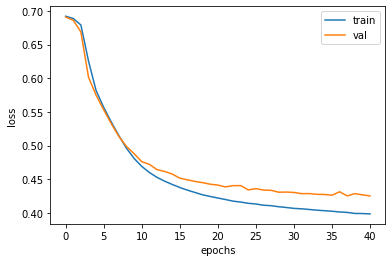

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

* 기본 순환층보다 LSTM이 과대적합을 억제하면서 훈련을 잘 수행함
* 경우에 따라서 과대적합을 더 강하게 제어할 필요가 있음 (규제, 드롭아웃 등을 활용하여)
## 순환층에 드롭아웃 적용하기

In [14]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.LSTM(8,dropout=0.3))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

In [20]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model2.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

history = model2.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 46ms/step - loss: 0.6925 - accuracy: 0.5282 - val_loss: 0.6914 - val_accuracy: 0.5638
Epoch 2/100
313/313 [==============================] - 17s 55ms/step - loss: 0.6902 - accuracy: 0.5825 - val_loss: 0.6881 - val_accuracy: 0.6210
Epoch 3/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6829 - accuracy: 0.6428 - val_loss: 0.6738 - val_accuracy: 0.6748
Epoch 4/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6352 - accuracy: 0.6953 - val_loss: 0.6071 - val_accuracy: 0.7018
Epoch 5/100
313/313 [==============================] - 11s 36ms/step - loss: 0.5905 - accuracy: 0.7120 - val_loss: 0.5808 - val_accuracy: 0.7200
Epoch 6/100
313/313 [==============================] - 11s 36ms/step - loss: 0.5674 - accuracy: 0.7336 - val_loss: 0.5589 - val_accuracy: 0.7376
Epoch 7/100
313/313 [==============================] - 11s 36ms/step - loss: 0.5484 - accuracy: 0.7474 - val_loss: 0.5403 - val_ac

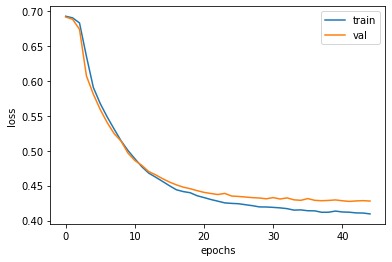

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

* 드롭아웃을 통해 훈련손실과 검증손실의 차이가 좁혀짐

## 2개의 층을 연결하기

In [22]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500,16,input_length=100))
model3.add(keras.layers.LSTM(8,dropout=0.3,return_sequences=True))
model3.add(keras.layers.LSTM(8,dropout=0.3))
model3.add(keras.layers.Dense(1,activation='sigmoid'))

model.summary()

* 앞쪽의 순환층이 모든 타임스텝에 대한 은닉상태를 출력해야함
* 마지막 순환층만 마지막 타임스텝의 은닉상태를 출력함!!
* 마지막을 제외한 다른 모든 순환층에  return_sequence = True로 지정한다.

In [23]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model3.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

history = model3.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 26s 70ms/step - loss: 0.6921 - accuracy: 0.5465 - val_loss: 0.6907 - val_accuracy: 0.5766
Epoch 2/100
313/313 [==============================] - 21s 68ms/step - loss: 0.6852 - accuracy: 0.6332 - val_loss: 0.6756 - val_accuracy: 0.6742
Epoch 3/100
313/313 [==============================] - 21s 67ms/step - loss: 0.6411 - accuracy: 0.6819 - val_loss: 0.5936 - val_accuracy: 0.7096
Epoch 4/100
313/313 [==============================] - 21s 67ms/step - loss: 0.5631 - accuracy: 0.7219 - val_loss: 0.5382 - val_accuracy: 0.7380
Epoch 5/100
313/313 [==============================] - 21s 67ms/step - loss: 0.5294 - accuracy: 0.7426 - val_loss: 0.5132 - val_accuracy: 0.7542
Epoch 6/100
313/313 [==============================] - 21s 68ms/step - loss: 0.5077 - accuracy: 0.7569 - val_loss: 0.4914 - val_accuracy: 0.7662
Epoch 7/100
313/313 [==============================] - 21s 67ms/step - loss: 0.4916 - accuracy: 0.7689 - val_loss: 0.4798 - val_ac

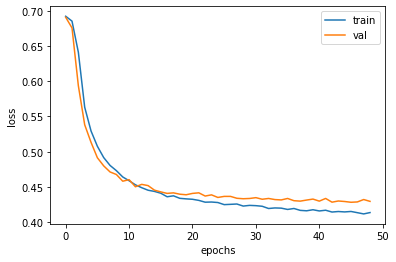

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

## GRU 구조

In [25]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500,16,input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


* GRU 셀에는 3개의 셀이 있다.
* 3 x (16x8 + 8x8 + 8 )= 600
* 어라? 요약에는 624개 인데??
* 실제로 작은 셀마다 하나의 절편이 추가되고 8개의 뉴런이 있으므로 24개가 더해짐

In [26]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model4.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

history = model4.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 40ms/step - loss: 0.6927 - accuracy: 0.5215 - val_loss: 0.6923 - val_accuracy: 0.5292
Epoch 2/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6912 - accuracy: 0.5576 - val_loss: 0.6907 - val_accuracy: 0.5474
Epoch 3/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6889 - accuracy: 0.5867 - val_loss: 0.6881 - val_accuracy: 0.5738
Epoch 4/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6854 - accuracy: 0.6062 - val_loss: 0.6842 - val_accuracy: 0.5896
Epoch 5/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6802 - accuracy: 0.6175 - val_loss: 0.6788 - val_accuracy: 0.6006
Epoch 6/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6730 - accuracy: 0.6284 - val_loss: 0.6710 - val_accuracy: 0.6124
Epoch 7/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6631 - accuracy: 0.6349 - val_loss: 0.6607 - val_ac

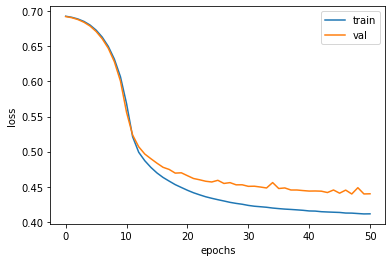

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

* LSTM 보다 작은 가중치이지만 좋은 성능을 내고 있음